In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
df = pd.read_csv('/content/Bike_Reviews.csv')
df.head()

,Varient Name,Price,Avg_Stars,Review title,Rating,Review
0,Bajaj Avenger Cruise 220,"1,20,000",4.1,Premium Bike,4,The Avenger Cruise 220 BS6 continues to have a...
1,Bajaj Avenger Cruise 220,"1,20,000",4.1,Changed the definition of bike - 220,5,Bajaj Avenger was the first ever model to chan...
2,Bajaj Avenger Cruise 220,"1,20,000",4.1,Avenger Cruise 220 blends style and comfort,4,Bajaj Avenger Cruise 220 is a bike that blends...
3,Bajaj Avenger Cruise 220,"1,20,000",4.1,Modern updates of Bajaj Avenger 220,5,The price is a big factor for the boost in Ave...
4,Bajaj Avenger Cruise 220,"1,20,000",4.1,Comfortable Bike,4,The price has increased but one can't complain...


In [ ]:
print("Before removing three columns, Shape of the dataset is: ")
print("Number of rows in data:", df.shape[0])
print("Number of columns in data:", df.shape[1])
df.drop(['Avg_Stars', 'Review title'], axis=1, inplace=True)
print("After removing two columns, Shape of the dataset is: ")
print("Number of rows in data:", df.shape[0])
print("Number of columns in data:", df.shape[1])

Before removing three columns, Shape of the dataset is: 
Number of rows in data: 12911
Number of columns in data: 6
After removing two columns, Shape of the dataset is: 
Number of rows in data: 12911
Number of columns in data: 4


In [ ]:
print("Number of null values in the dataset before removing null values: ")
print(df.isnull().sum())
df.dropna(axis=0, inplace=True)
print("Number of null values in the dataset after removing null values: ")
print(df.isnull().sum())

Number of null values in the dataset before removing null values: 
Varient Name     0
Price            0
Rating           0
Review          52
dtype: int64
Number of null values in the dataset after removing null values: 
Varient Name    0
Price           0
Rating          0
Review          0
dtype: int64


In [ ]:
print("Number of duplicate values in the dataset before removing duplicate values: ")
print(df.duplicated().sum())
df.drop_duplicates(keep='first', inplace=True)
print("Number of duplicate values in the dataset after removing duplicate values: ")
print(df.duplicated().sum())

Number of duplicate values in the dataset before removing duplicate values: 
61
Number of duplicate values in the dataset after removing duplicate values: 
0


In [ ]:
df['Rating'].value_counts()

5    6881
4    4755
3     734
1     255
2     173
Name: Rating, dtype: int64

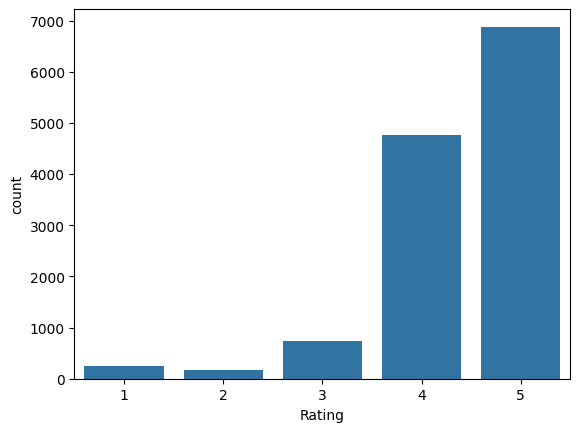

In [ ]:
sns.countplot(x=df['Rating'])
plt.show()

In [ ]:
def sentiment(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Average'
    else:
        return 'Negative'

In [ ]:
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head(10)

,Varient Name,Price,Rating,Review,Sentiment
0,Bajaj Avenger Cruise 220,"1,20,000",4,The Avenger Cruise 220 BS6 continues to have a...,Positive
1,Bajaj Avenger Cruise 220,"1,20,000",5,Bajaj Avenger was the first ever model to chan...,Positive
2,Bajaj Avenger Cruise 220,"1,20,000",4,Bajaj Avenger Cruise 220 is a bike that blends...,Positive
3,Bajaj Avenger Cruise 220,"1,20,000",5,The price is a big factor for the boost in Ave...,Positive
4,Bajaj Avenger Cruise 220,"1,20,000",4,The price has increased but one can't complain...,Positive
5,Bajaj Avenger Cruise 220,"1,20,000",5,The windshield is the best feature for me in B...,Positive
6,Bajaj Avenger Cruise 220,"1,20,000",5,My bike was purchased in 2021. From my persona...,Positive
7,Bajaj Avenger Cruise 220,"1,20,000",3,The side stand sensor is having serious proble...,Average
8,Bajaj Avenger Cruise 220,"1,20,000",4,Just one problem braking problems Pros include...,Positive
9,Bajaj Avenger Cruise 220,"1,20,000",3,Wish for a bigger fuel tank. Average buying ex...,Average


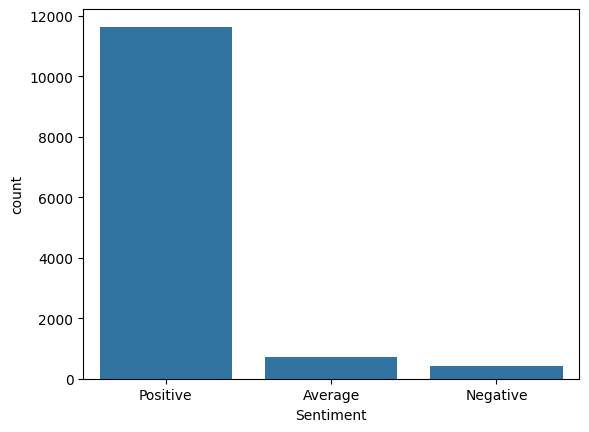

In [ ]:
sns.countplot(x=df['Sentiment'])
plt.show()

In [ ]:
def clean_text(text):
    stop = stopwords.words('english')
    punc = list(punctuation)
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text)
    word_tokens = [t for t in tokens if t.isalpha()]
    clean_tokens = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return ' '.join(clean_tokens)


df['Text'] = df['Review'].apply(clean_text)
df.head()

,Varient Name,Price,Rating,Review,Sentiment,Text
0,Bajaj Avenger Cruise 220,"1,20,000",4,The Avenger Cruise 220 BS6 continues to have a...,Positive,the avenger cruise continues typical cruiser m...
1,Bajaj Avenger Cruise 220,"1,20,000",5,Bajaj Avenger was the first ever model to chan...,Positive,bajaj avenger first ever model change definiti...
2,Bajaj Avenger Cruise 220,"1,20,000",4,Bajaj Avenger Cruise 220 is a bike that blends...,Positive,bajaj avenger cruise bike blend style comfort ...
3,Bajaj Avenger Cruise 220,"1,20,000",5,The price is a big factor for the boost in Ave...,Positive,the price big factor boost avenger bike offere...
4,Bajaj Avenger Cruise 220,"1,20,000",4,The price has increased but one can't complain...,Positive,the price increased one ca complain bike givin...


In [ ]:
X = df['Text']
y = df['Sentiment']
vec = TfidfVectorizer()
X = vec.fit_transform(X).toarray()
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier()

# Combine the models using majority voting
comb_models = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')

# Fit the ensemble on the training data
comb_models.fit(X_train, y_train)

# Evaluate the performance of the ensemble on the testing data
#print(f"Accuracy of the ensemble: {ensemble.score(X_test, y_test)*100} %")

y_pred = comb_models.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85664
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.11      0.12       171
           1       0.31      0.31      0.31        86
           2       0.92      0.93      0.93      2303

    accuracy                           0.86      2560
   macro avg       0.45      0.45      0.45      2560
weighted avg       0.85      0.86      0.85      2560



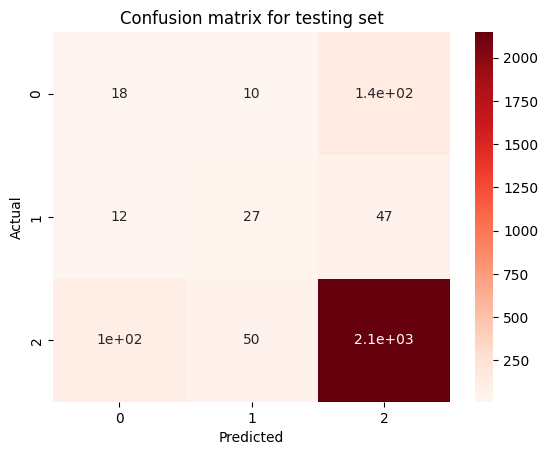

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for testing set')
plt.show()